In [135]:
import matplotlib.pyplot as plt
from PIL import Image, ImageChops, ImageEnhance
import numpy as np

In [136]:
def ncc(a,b):
    a = a - a.mean(axis=0)
    b = b - b.mean(axis=0)
    return np.sum(((a/np.linalg.norm(a)) * (b/np.linalg.norm(b))))

In [137]:
def nccAlign(a, b, t):
    min_ncc = -1
    ivalue=np.linspace(-t,t,2*t,dtype=int)
    jvalue=np.linspace(-t,t,2*t,dtype=int)
    for i in ivalue:
        for j in jvalue:
            nccDiff = ncc(a,np.roll(b,[i,j],axis=(0,1)))
            if nccDiff > min_ncc:
                min_ncc = nccDiff
                output = [i,j]
    return output

C:\Users\Efe\AppData\Local\Temp\ipykernel_15260\1165904954.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


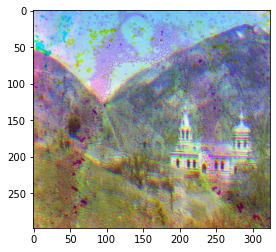

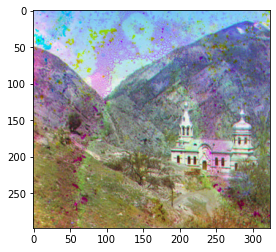

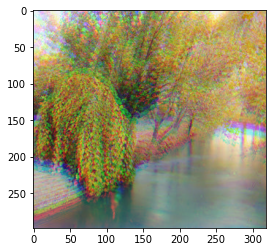

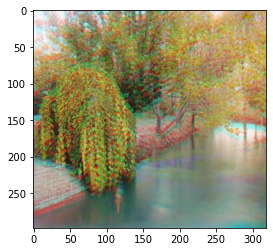

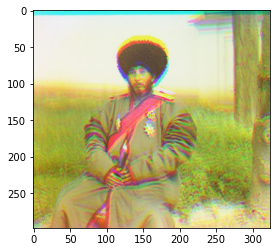

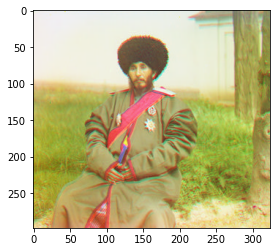

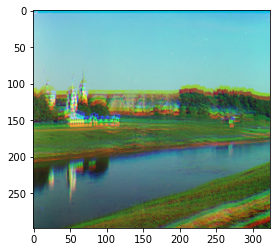

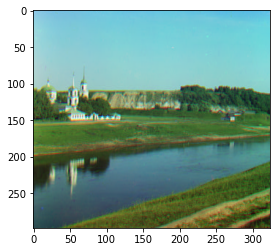

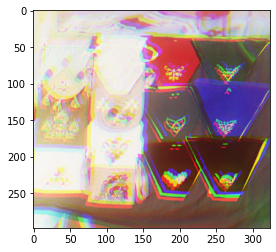

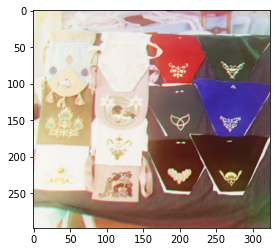

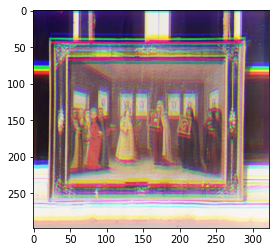

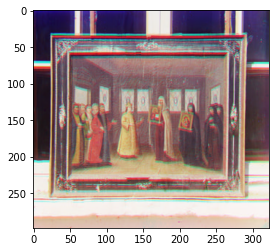

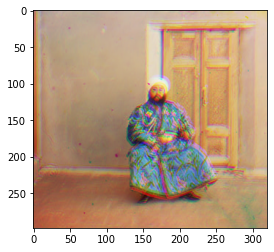

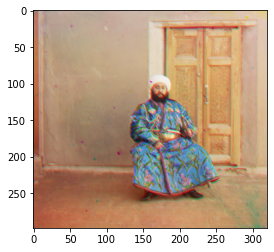

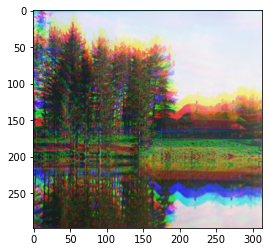

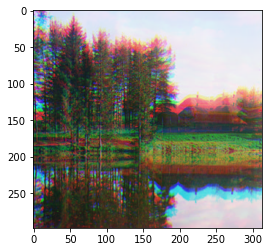

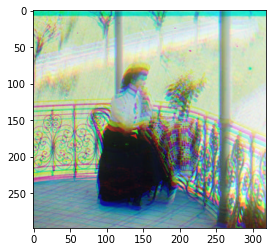

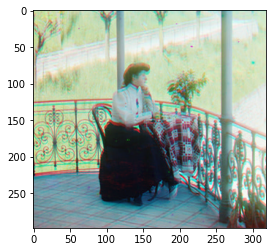

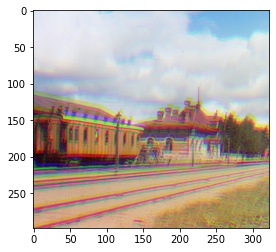

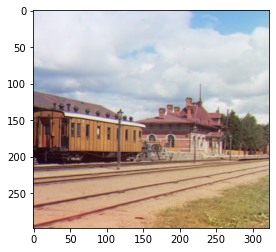

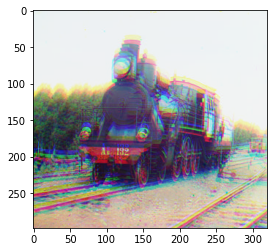

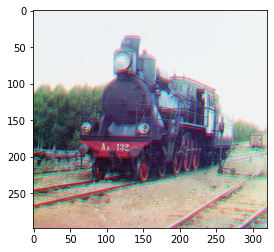

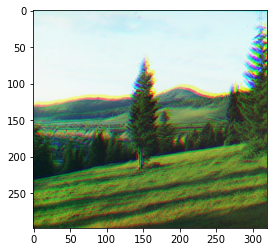

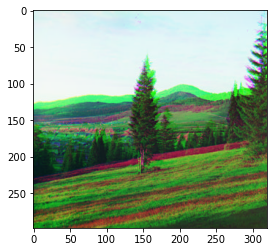

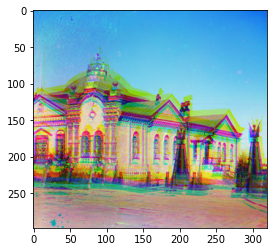

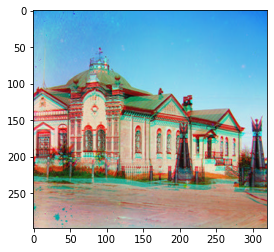

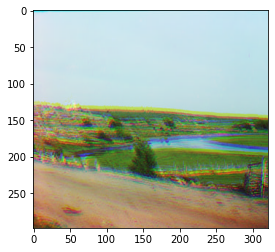

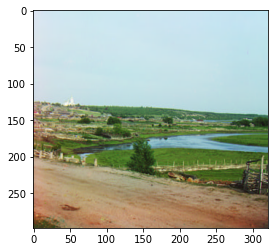

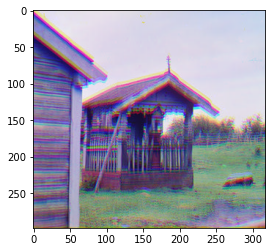

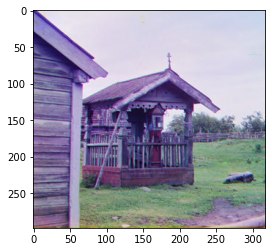

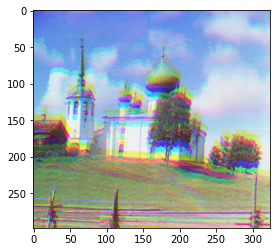

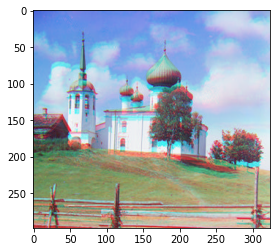

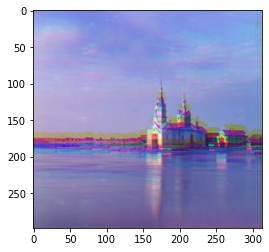

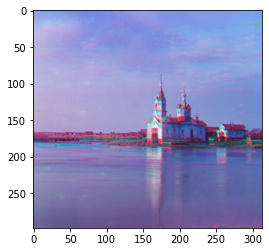

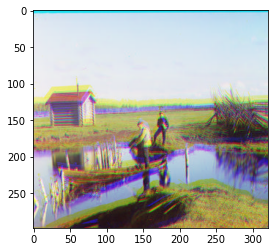

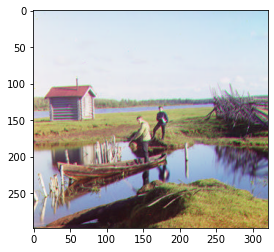

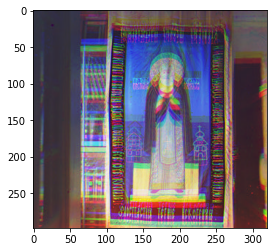

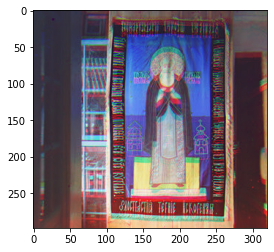

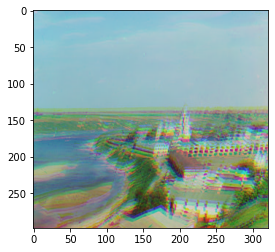

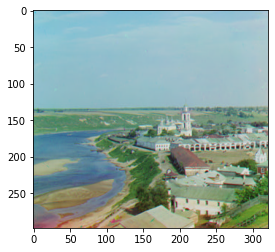

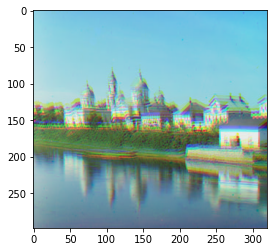

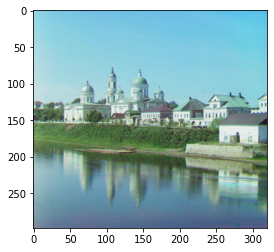

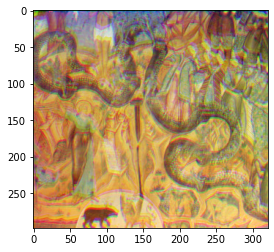

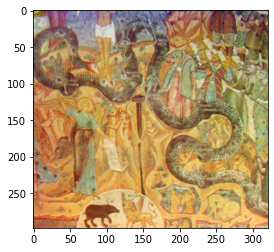

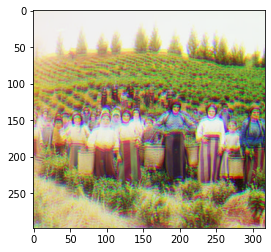

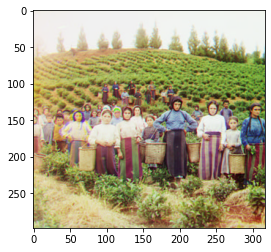

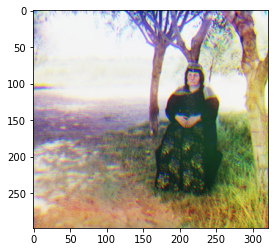

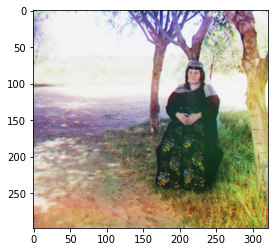

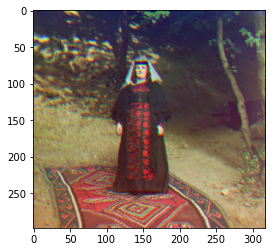

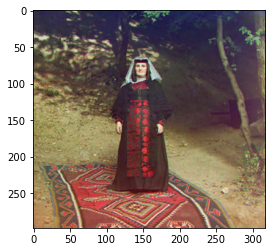

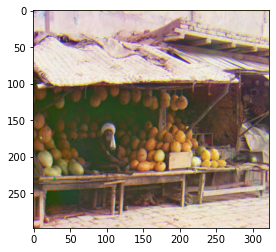

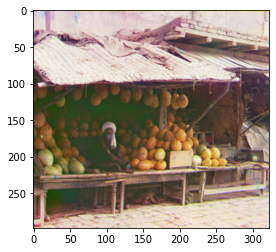

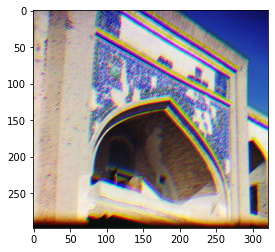

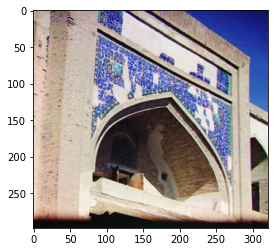

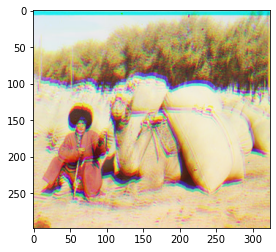

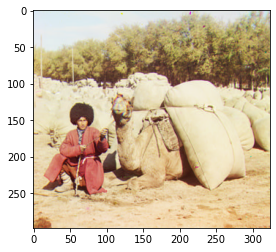

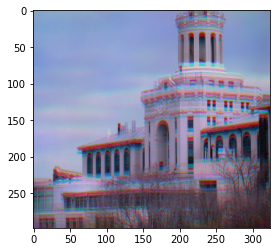

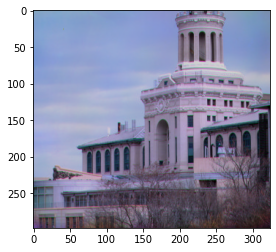

In [138]:
files = [f for f in os.listdir('./original/')]

for file in files:
    if not file.endswith(".jpg"):
        continue
        
    name = file.split('.')[0] + '.jpg'
    img = Image.open("./original/" + name)
    img = np.asarray(img)
    
    w,h=img.shape
    img=img[int(w*0.01):int(w-w*0.02),int(h*0.05):int(h-h*0.05)]
          
    width ,height = img.shape
    w=int(width/3)
    blue=img[0:w,:]
    green=img[w:2*w,:]
    red=img[2*w:3*w,:]
    
    #without aligment
    coloured = (np.dstack((red,green,blue))).astype(np.uint8)
    coloured = coloured[int(coloured.shape[0]*0.05):int(coloured.shape[0]-coloured.shape[0]*0.05),int(coloured.shape[1]*0.05):int(coloured.shape[1]-coloured.shape[1]*0.05)]
    coloured = Image.fromarray(coloured)
    coloured.save("./coloured/" + "coloured_" + name)
    plt.figure()
    plt.imshow(coloured)
    
    
    #NCC aligment
    alignGtoB = nccAlign(blue,green,8)
    alignRtoB = nccAlign(blue,red,8)
    g = np.roll(green,alignGtoB,axis=(0,1))
    r = np.roll(red,alignRtoB,axis=(0,1))
    aligned = (np.dstack((r,g,blue))).astype(np.uint8)
    aligned = aligned[int(aligned.shape[0]*0.05):int(aligned.shape[0]-aligned.shape[0]*0.05),int(aligned.shape[1]*0.05):int(aligned.shape[1]-aligned.shape[1]*0.05)]
    aligned = Image.fromarray(aligned)
    aligned.save("./aligned/" + "aligned_" + name)
    plt.figure()
    plt.imshow(aligned)
    


    

In [139]:
    #Image enhance
    files = [f for f in os.listdir('./aligned/')]

    for file in files:
        if not file.endswith(".jpg"):
            continue
        name = file.split('.')[0] + '.jpg'
        img = Image.open("./aligned/" + name)
    
        enhancer = ImageEnhance.Sharpness(img)
        enhancer1 = ImageEnhance.Brightness(img)
        img_en = enhancer.enhance(1.8)
        img_en = enhancer1.enhance(1.1)
        img_en.save("./enhanced/" + "enhanced_" + name)    